In [78]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [79]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [80]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [81]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [82]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [83]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [84]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [85]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [86]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x140c19b90>,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08}

In [87]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x140c4ed50>,
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US'}

# Exploratory Precipitation Analysis

In [88]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement).order_by(Measurement.date.desc()).first()
recent_date.date

'2017-08-23'

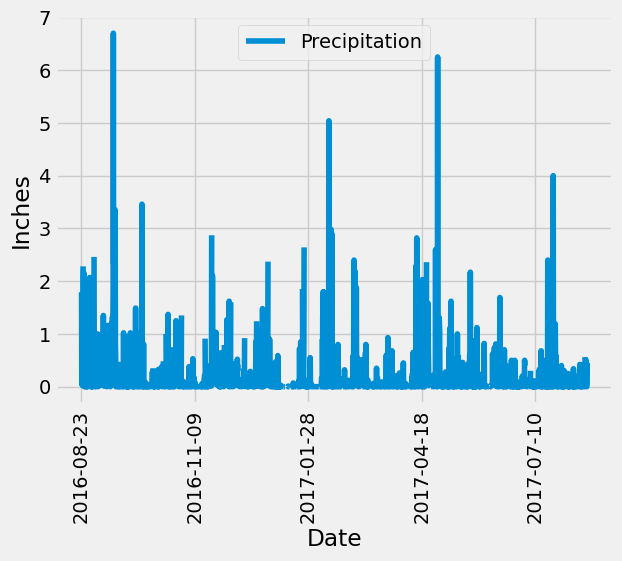

In [89]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prior_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prior_year_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prior_year)
prior_year_results_list = []
for row in prior_year_results:
    day_results = {}
    day_results["Date"] = row.date
    day_results["Precipitation"] = row.prcp
    prior_year_results_list.append(day_results)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prior_year_results_df = pd.DataFrame(prior_year_results_list)

# Sort the dataframe by date
prior_year_results_df = prior_year_results_df.sort_values("Date", ascending=True)
prior_year_results_df = prior_year_results_df.set_index("Date")
# Use Pandas Plotting with Matplotlib to plot the data
prior_year_results_df.plot(rot=90)
plt.ylabel("Inches")
plt.xlabel("Date")
plt.show()

In [90]:
# Use Pandas to calculate the summary statistics for the precipitation data
prior_year_results_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [91]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(Station).group_by(Station.station).count()
stations

9

In [92]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [93]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281")
for row in most_active_station:
    print(row)


(54.0, 85.0, 71.66378066378067)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


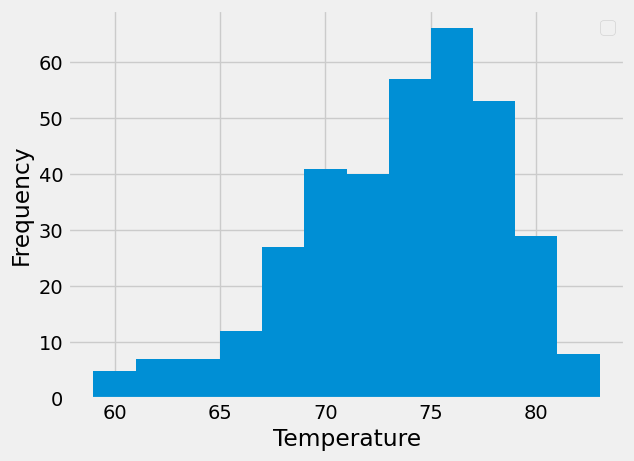

In [94]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Query the prior year for most active station

most_act_st_yr = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date >= prior_year).all()
temperatures = []

# Create a list that will hold temperatures
[temperatures.append(x.tobs) for x in most_act_st_yr]

# Create histogram
plt.hist(temperatures, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Close Session

In [95]:
# Close Session
session.close()